In [478]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import f1_score,confusion_matrix

%matplotlib inline

df=pd.read_csv("Desktop\Project\heart.csv") 





In [479]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [480]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [481]:
def generate_accuracy_and_heatmap(model, X,y):
#   cm = confusion_matrix(y,model.predict(X))
#   sns.heatmap(cm,annot=True,fmt="d")
    ac=accuracy_score(y,model.predict(X))
    f_score=f1_score(y,model.predict(X))
    print('Accuracy is :',ac)
    print('F1 score is :',f_score)
    print("\n")
    print(pd.crosstab(pd.Series(model.predict(X),name = 'Predicted'),pd.Series(y['target'],name='Actual')))
    
    
    return 1

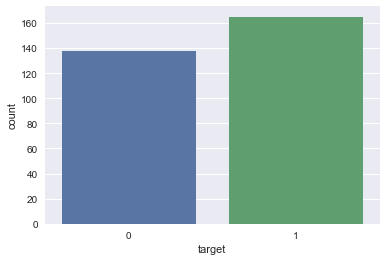

In [482]:
sns.countplot(x="target", data=df)

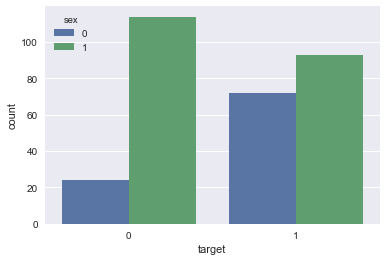

In [483]:
sns.countplot(x="target", hue= "sex" , data=df)

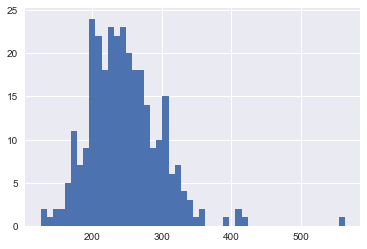

In [484]:
df["chol"].hist(bins=50)

In [485]:
X=df.iloc[:, 0:-1]
y=df["target"]


In [486]:

numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [487]:
target = 'target'

In [488]:
from sklearn.preprocessing import Imputer

imp= Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X)
X=pd.DataFrame(data=imp.transform(X) , columns=X.columns)

In [489]:

df.apply(lambda x:sum(x.isnull()),axis=0)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [490]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [491]:
from sklearn.preprocessing import StandardScaler

In [492]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [493]:
scaled_data=scaler.transform(df)

In [494]:
scaled_data

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ..., 
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [495]:
from sklearn.decomposition import PCA


In [496]:
pca=PCA(n_components=5)

In [497]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [498]:
X_pca=pca.transform(scaled_data)

In [499]:
scaled_data.shape

(303, 14)

In [500]:
X_pca.shape

(303, 5)

In [501]:
scaled_data

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ..., 
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [502]:
X_pca

array([[-0.05173911,  2.62402204,  0.99005387,  3.47932755,  0.36277276],
       [-0.81744059, -0.73037458, -0.23592842,  2.76754545,  2.25840401],
       [-2.05759932, -0.03909845, -0.51983865,  0.08119845,  0.86041578],
       ..., 
       [ 2.68177206,  0.59301894,  1.791015  ,  1.30026165, -1.33135083],
       [ 2.17085793, -2.16699205, -0.08151565,  0.89024401, -1.17744449],
       [-0.36575966,  0.78791608, -0.39585992, -0.42187774,  0.203408  ]])

In [503]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_pca, y, test_size=0.25,random_state=1)


In [504]:
print(df.shape)
print(X_pca.shape)

(303, 14)
(303, 5)


In [505]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=1)
lr_baseline_model =classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [506]:
from sklearn.metrics import confusion_matrix as cm
cm=cm (y_test,y_pred)
cm

array([[31,  4],
       [ 1, 40]])

In [507]:
generate_accuracy_and_heatmap(lr_baseline_model, X_test, y_test)

Accuracy is : 0.934210526316
F1 score is : 0.941176470588




KeyError: 'target'

,Feature,Scores
7,thalach,133.619624
11,ca,60.845372
2,cp,41.020975
9,oldpeak,37.229507
8,exang,26.790556
0,age,17.914852
4,chol,14.146944
1,sex,5.671993
10,slope,5.390543
12,thal,3.974613


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
235,51.0,1.0,0.0,140.0,299.0,0.0,1.0,173.0,1.0,1.6,2.0,0.0,3.0
131,49.0,0.0,1.0,134.0,271.0,0.0,1.0,162.0,0.0,0.0,1.0,0.0,2.0
77,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0


array([[   0.,  173.,    0.],
       [   1.,  162.,    0.],
       [   1.,  164.,    0.],
       [   0.,  160.,    1.]])

ValueError: X has 13 features per sample; expecting 3

array([  10.81782088,    3.59449902,  116.16984746,   67.24482759])

Accuracy score:  0.82
